<a href="https://colab.research.google.com/github/emms204/Keras/blob/main/Building_a_regression_model_with_Keras_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Model Using Keras  to model the same data about concrete compressive strength

In [130]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [131]:
data = pd.read_csv('/content/concrete_data.csv')

In [132]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [133]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##Visualizing our predictiors and also checking out Outliers in the predictors we can see that Age has Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

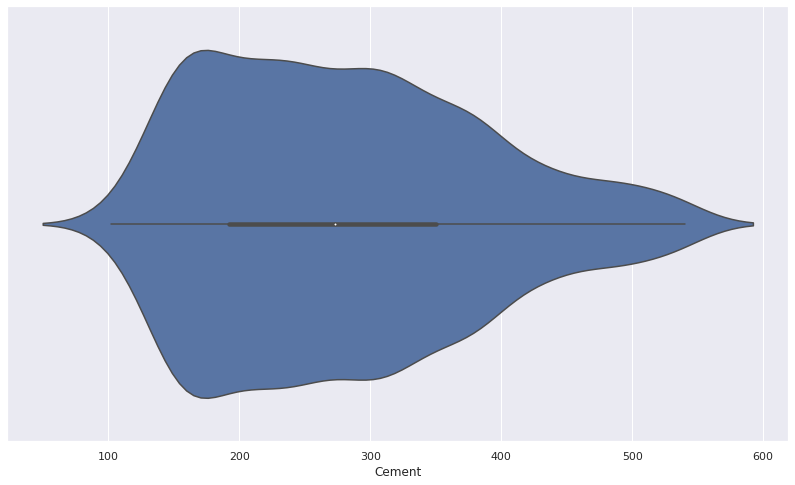

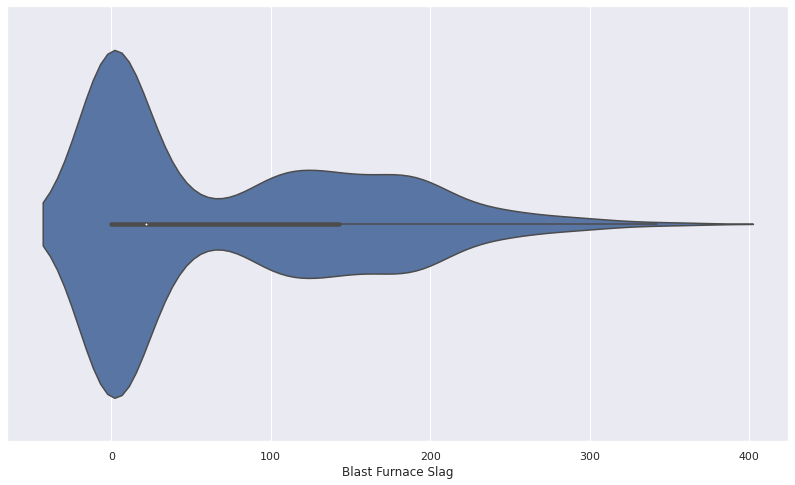

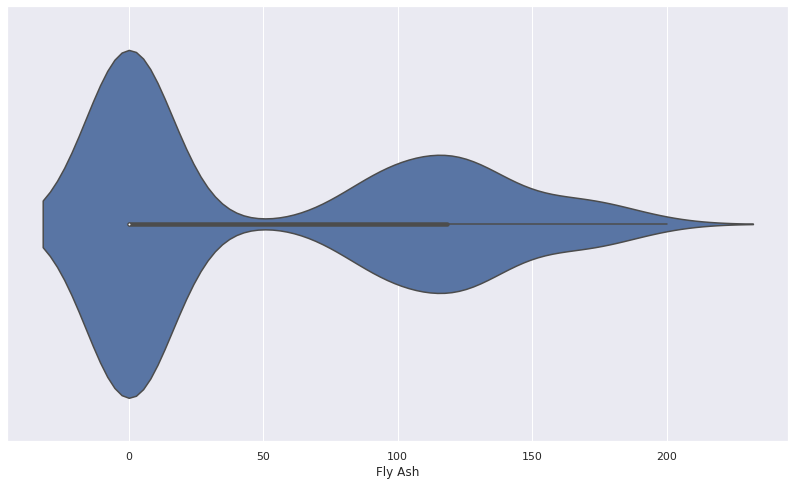

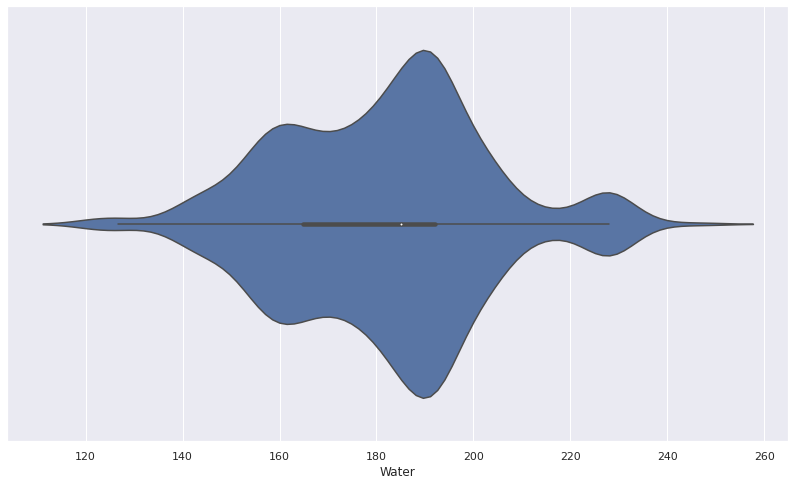

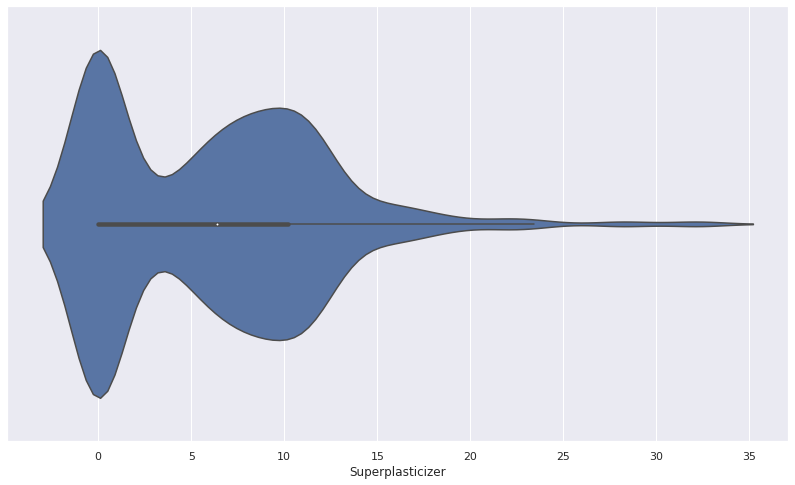

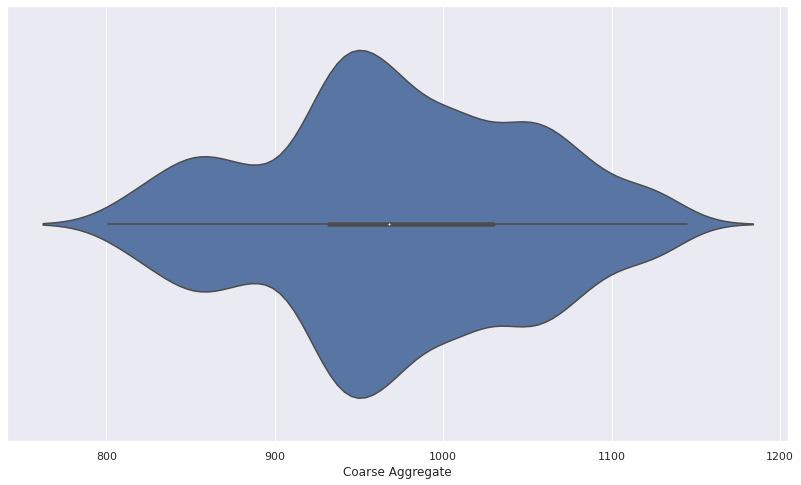

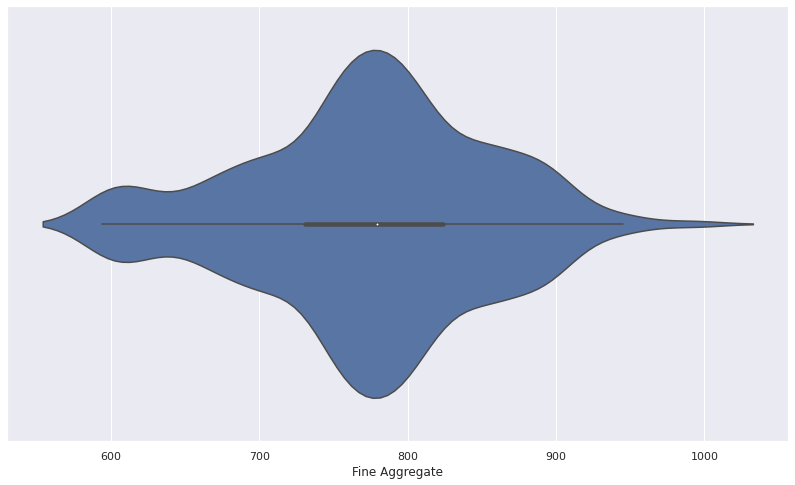

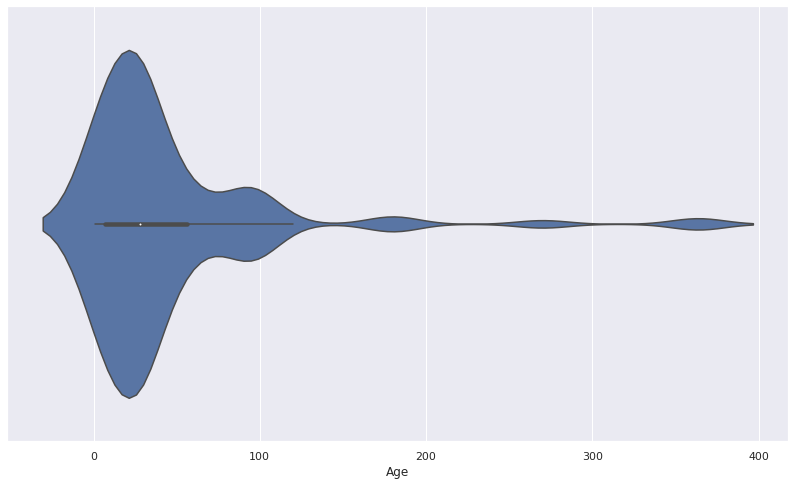

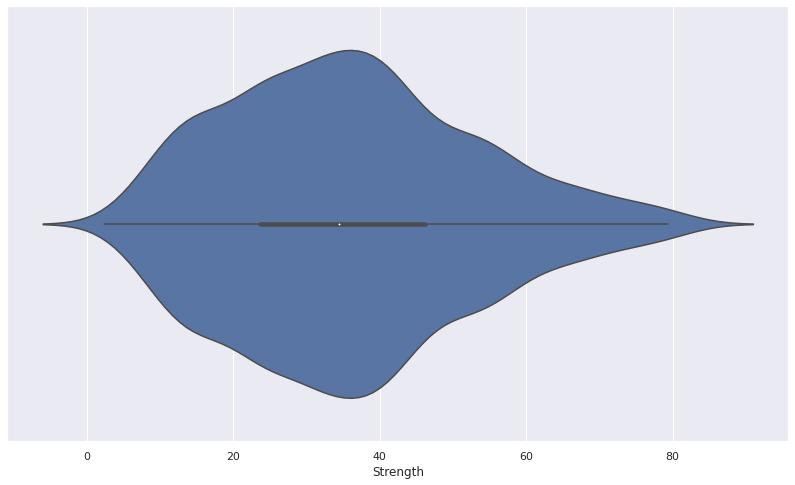

In [134]:
for i in data.columns:
  plt.figure(figsize=(14,8))
  sns.violinplot(data[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

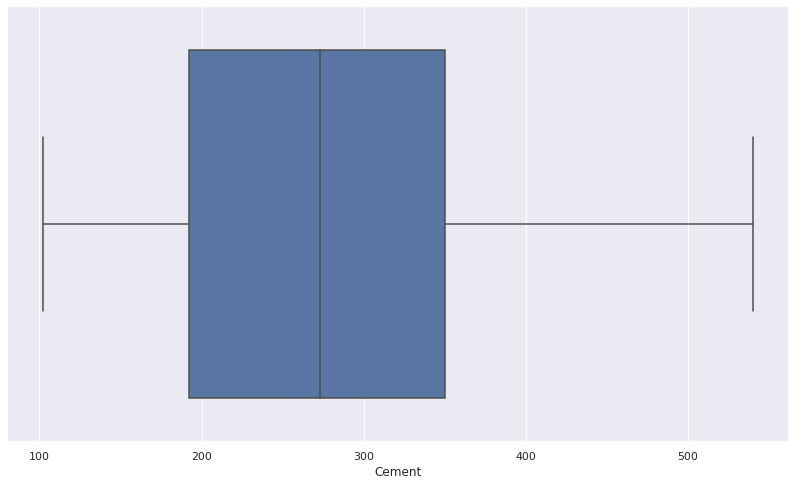

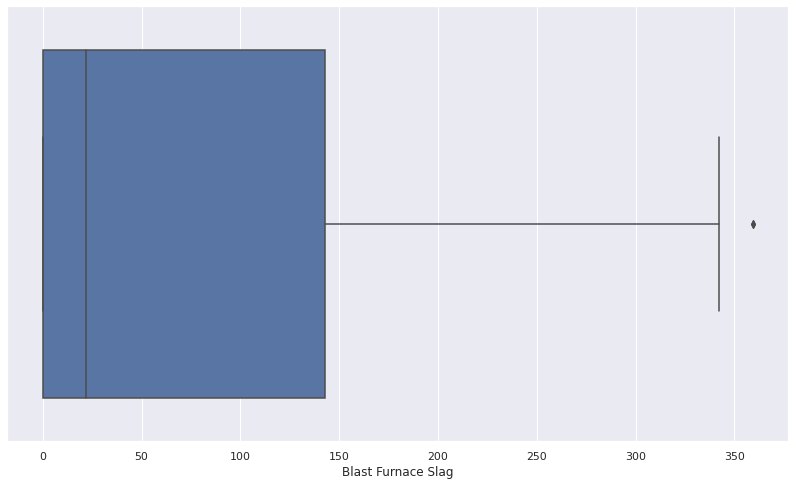

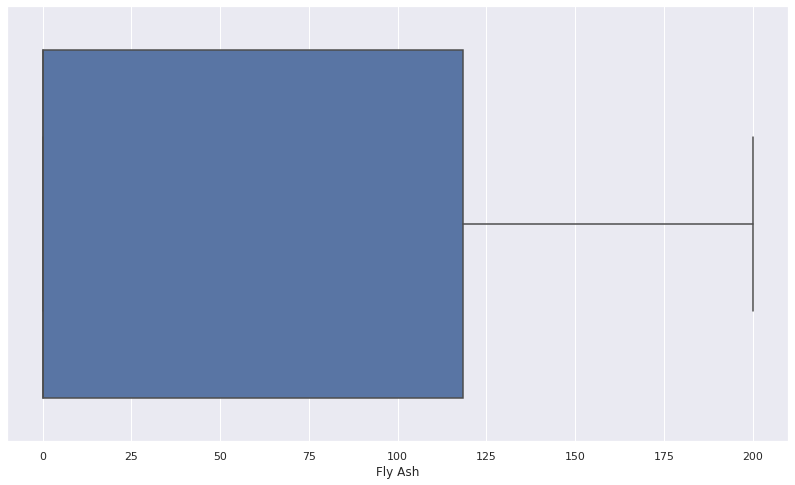

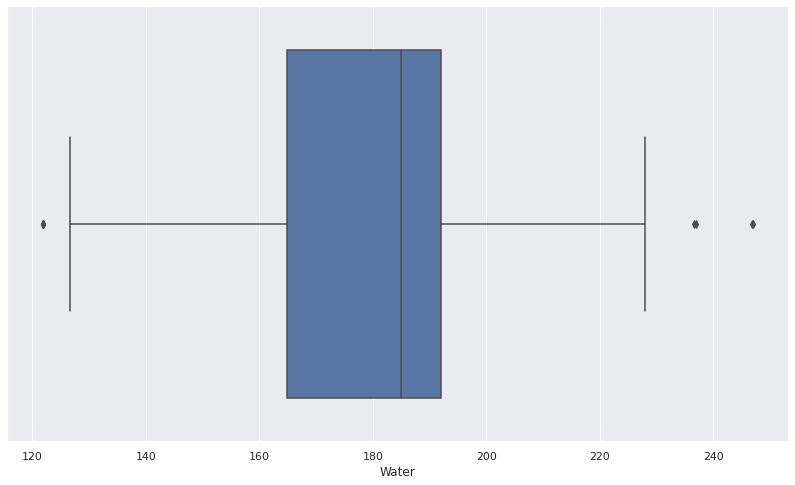

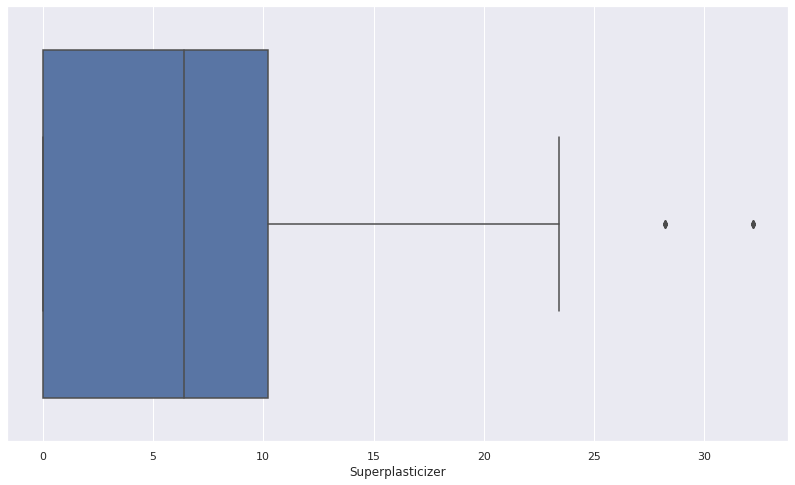

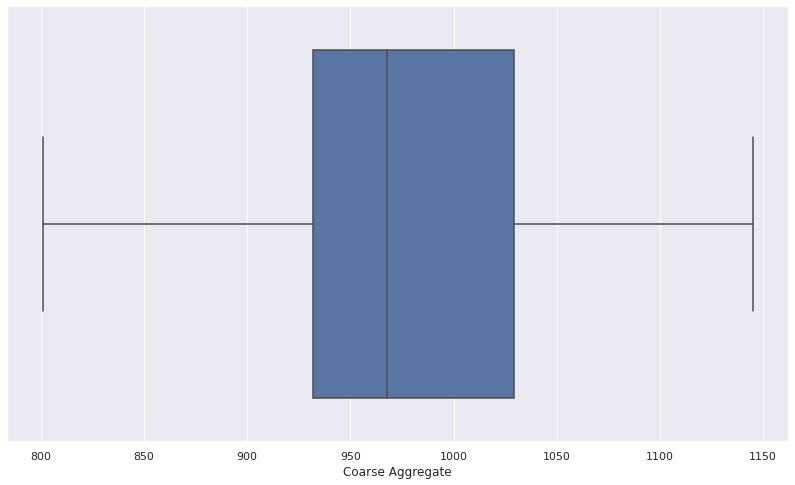

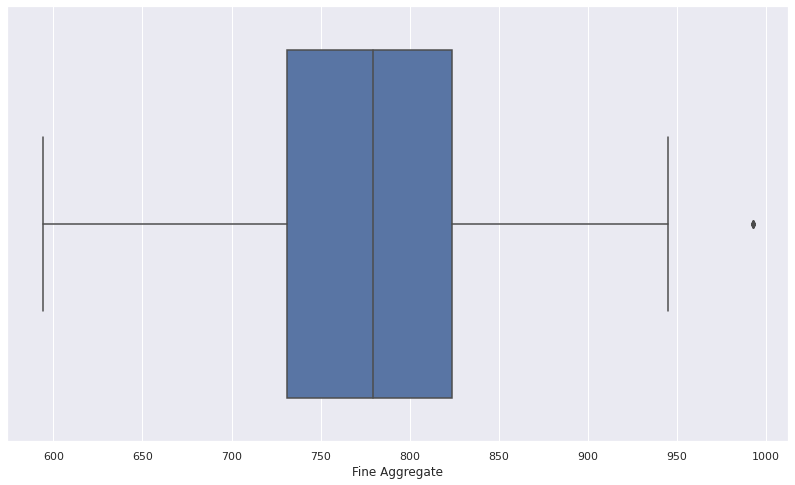

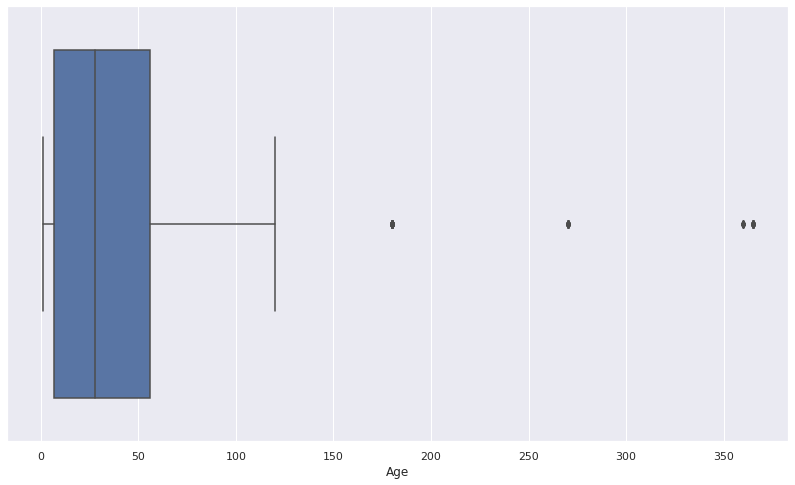

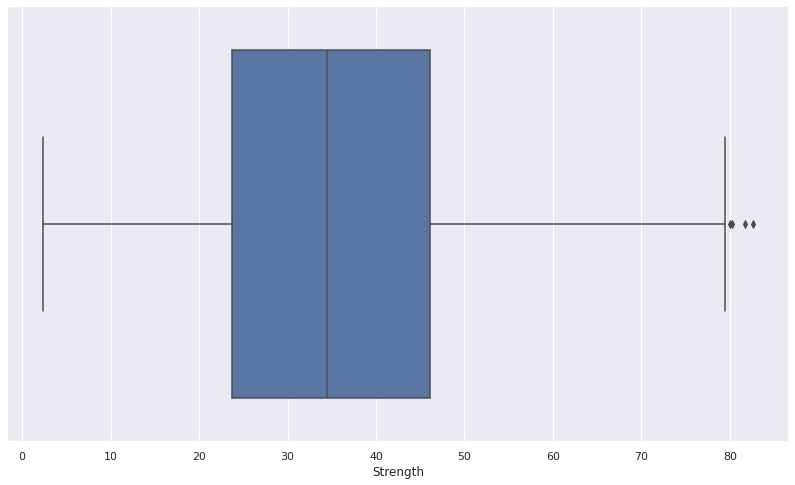

In [135]:
for i in data.columns:
  plt.figure(figsize=(14,8))
  sns.boxplot(data[i])

##After running the Test set it seems Our neural nets aren't really affected by outliers

##Visualizing the relationships between our columns 

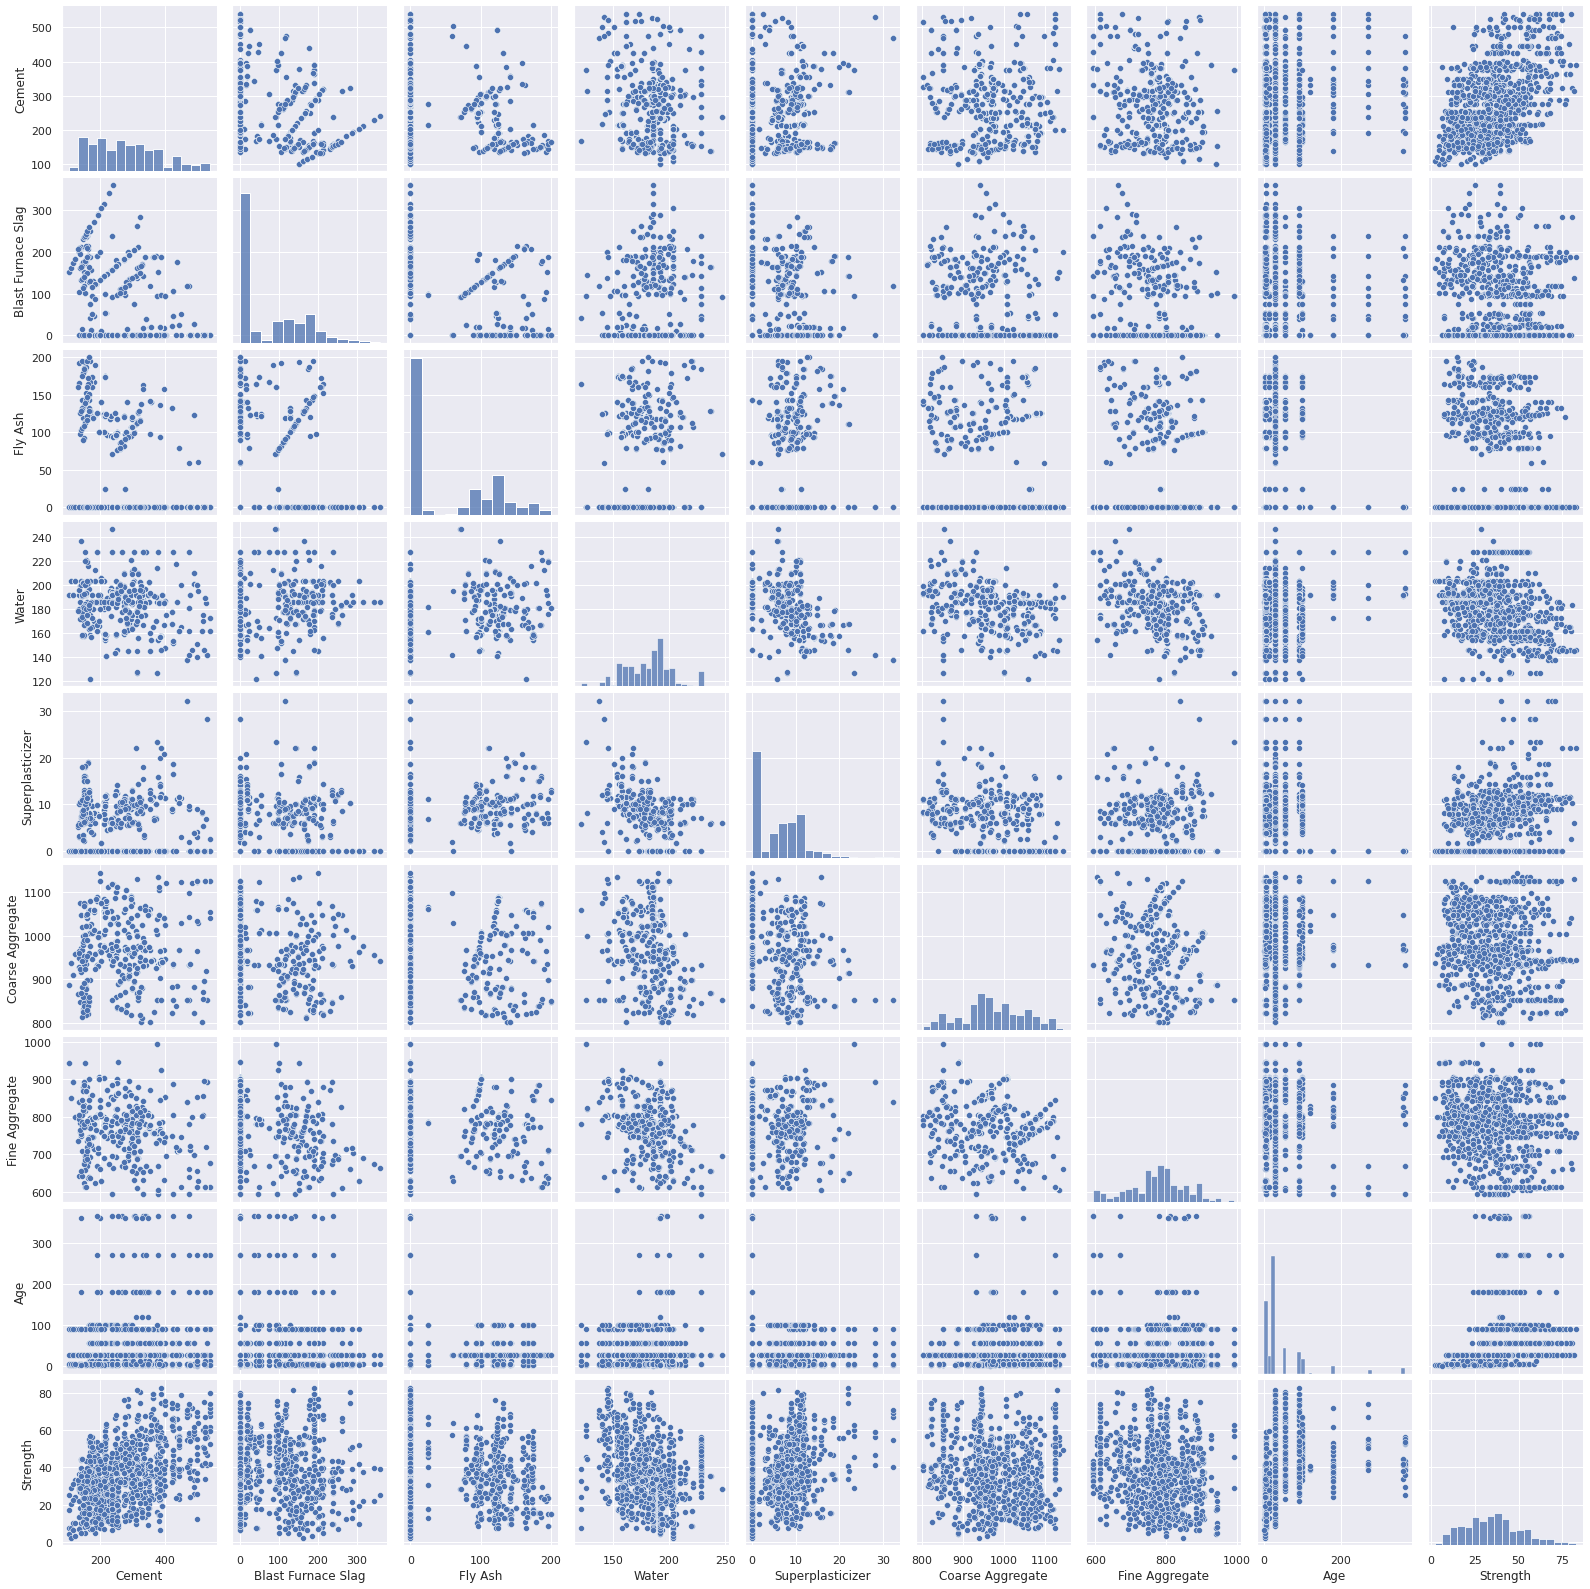

In [137]:
sns.pairplot(data[data.columns])

##Cement and Strength seem to have a strength linear relationship

## Training the Model

In [138]:
X = data.loc[:,data.columns!='Strength']
y = data['Strength']

##Uncommenting normalization of data

In [139]:
#X_norm = (X - X.mean())/X.std()
#X_norm

In [140]:
n_cols = X_norm.shape[1]

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [143]:
def regression_model():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu', input_shape=(n_cols,)),
                               tf.keras.layers.Dense(1)
  ])
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [144]:
model = regression_model()

In [145]:
model.fit(X_train, y_train, epochs=50, verbose=0)

##Testing Model on Test data

In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
preds= model.predict(X_test)

In [148]:
print(mean_squared_error(y_test,preds))

303.49772143229876


##Train and Test the model

In [149]:
from sklearn.model_selection import KFold

In [150]:
model_mse = []
fold = KFold(n_splits=50)
for train_index,test_index in fold.split(X,y):
  X_train_1, X_test_1 = X.iloc[train_index],X.iloc[test_index]
  y_train_1, y_test_1 = y.iloc[train_index],y.iloc[test_index]
  
  model_1 = regression_model()
  model_1.fit(X_train_1, y_train_1, epochs=50, verbose=0)
  pred_1 = model_1.predict(X_test_1)
  model_mse.append(mean_squared_error(y_test_1,pred_1))

print("The Mean Squared Error of 50 iterations is",np.mean(model_mse))
print("The Standard Deviation of 50 iterations is",np.std(model_mse))

The Mean Squared Error of 50 iterations is 286.4290847493263
The Standard Deviation of 50 iterations is 585.2584723741817


In [151]:
model_mse

[789.4397775002317,
 166.84141813184092,
 209.88282231874572,
 755.6654400547695,
 369.01678084443733,
 79.49112109605338,
 149.3051341743524,
 173.44052461420156,
 4166.978547508574,
 232.9943941606172,
 157.09385462854715,
 169.83710065926067,
 94.8589421104816,
 92.83682600764057,
 86.79528697073081,
 198.83660079194166,
 215.24369655330676,
 230.97253911325987,
 177.32351797082418,
 206.99587145811452,
 20.73216921734744,
 170.16698268890212,
 141.69686413399629,
 174.54912740632804,
 430.7177678266207,
 132.59152552787742,
 94.09907670108038,
 113.51508766849227,
 59.28528230694935,
 789.8844564013782,
 112.74257730560097,
 86.60385231906763,
 574.3240037222522,
 328.58063238823445,
 89.72547210785436,
 70.52304744417995,
 532.4744209469478,
 89.93466968977985,
 55.54727092384728,
 397.2276917239201,
 145.16485062993485,
 47.46139882085441,
 39.378827170734695,
 69.24752189339124,
 160.78802134989274,
 341.7570936568651,
 70.28688014032014,
 54.440817067176894,
 117.43568567408722